<a href="https://colab.research.google.com/github/gpdsec/DataScience-Python/blob/master/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from scipy.stats import spearmanr, pearsonr
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Input/train.csv")
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [5]:
# dropping columns with massivelly missing values
drop_col = ['index','user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix', 'user/gender', 'user/profileName']
df.drop(drop_col, axis=1, inplace=True)

In [6]:
le1 =  LabelEncoder()
le2 = LabelEncoder()
df["name"] = le1.fit_transform(df['beer/name'])
df['style'] = le2.fit_transform(df['beer/style'])



In [7]:
df.describe()

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,name,style
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,37500.000000,37500.000000
mean,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,745.476640,40.390027
std,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,433.215159,30.491464
min,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,0.000000,0.000000
25%,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,564.000000,11.000000
50%,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,615.000000,35.000000
75%,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1100.250000,77.000000
max,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,1687.000000,94.000000


In [8]:
df.corr()

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,name,style
beer/ABV,1.000000,0.330658,0.007455,0.288376,0.386340,0.197005,0.350656,0.354033,0.248846,-0.148708,-0.095753
beer/beerId,0.330658,1.000000,0.523657,-0.007204,0.045427,-0.021981,0.027752,0.019321,0.424539,-0.065028,-0.001832
beer/brewerId,0.007455,0.523657,1.000000,-0.077973,-0.081571,-0.084932,-0.066468,-0.100513,0.206507,-0.027332,0.024341
review/appearance,0.288376,-0.007204,-0.077973,1.000000,0.538076,0.498733,0.555833,0.531676,0.067531,-0.107376,-0.073630
review/aroma,0.386340,0.045427,-0.081571,0.538076,1.000000,0.616117,0.608922,0.711809,0.109106,-0.170070,-0.054826
review/overall,0.197005,-0.021981,-0.084932,0.498733,0.616117,1.000000,0.697220,0.785220,0.065383,-0.083765,-0.065630
review/palate,0.350656,0.027752,-0.066468,0.555833,0.608922,0.697220,1.000000,0.732092,0.094538,-0.128418,-0.051856
review/taste,0.354033,0.019321,-0.100513,0.531676,0.711809,0.785220,0.732092,1.000000,0.092100,-0.144746,-0.048311
review/timeUnix,0.248846,0.424539,0.206507,0.067531,0.109106,0.065383,0.094538,0.092100,1.000000,-0.133556,-0.059654
name,-0.148708,-0.065028,-0.027332,-0.107376,-0.170070,-0.083765,-0.128418,-0.144746,-0.133556,1.000000,-0.119532


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beer/ABV           37500 non-null  float64
 1   beer/beerId        37500 non-null  int64  
 2   beer/brewerId      37500 non-null  int64  
 3   beer/name          37500 non-null  object 
 4   beer/style         37500 non-null  object 
 5   review/appearance  37500 non-null  float64
 6   review/aroma       37500 non-null  float64
 7   review/overall     37500 non-null  float64
 8   review/palate      37500 non-null  float64
 9   review/taste       37500 non-null  float64
 10  review/text        37490 non-null  object 
 11  review/timeStruct  37500 non-null  object 
 12  review/timeUnix    37500 non-null  int64  
 13  name               37500 non-null  int64  
 14  style              37500 non-null  int64  
dtypes: float64(6), int64(5), object(4)
memory usage: 4.3+ MB


In [10]:
#rcParams['figure.figsize']= 800,4
#plt.style.use('seaborn-whitegrid')

In [11]:
len(df['review/timeUnix'].unique())


37490

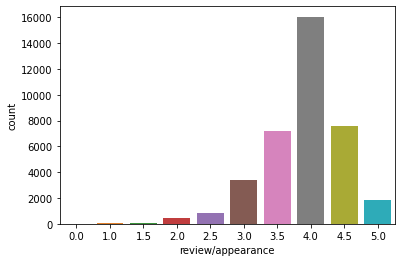

In [12]:
sns.countplot(df['review/appearance'])

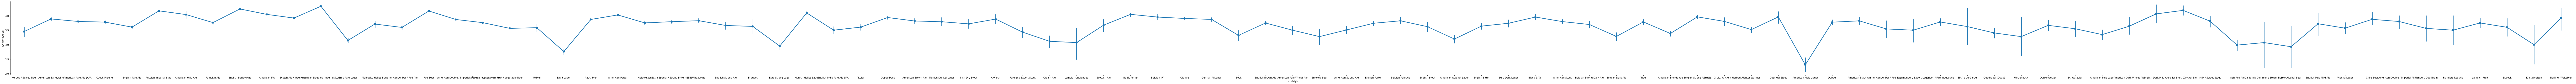

In [13]:
sns.catplot(x='beer/style', y='review/overall', data=df, kind='point', aspect=30)

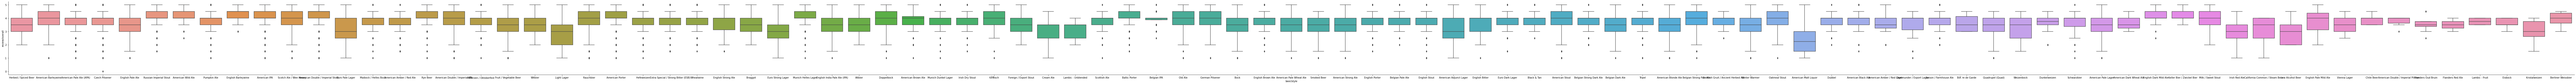

In [14]:
sns.catplot(x='beer/style', y='review/overall', data=df, kind='box', aspect=30)

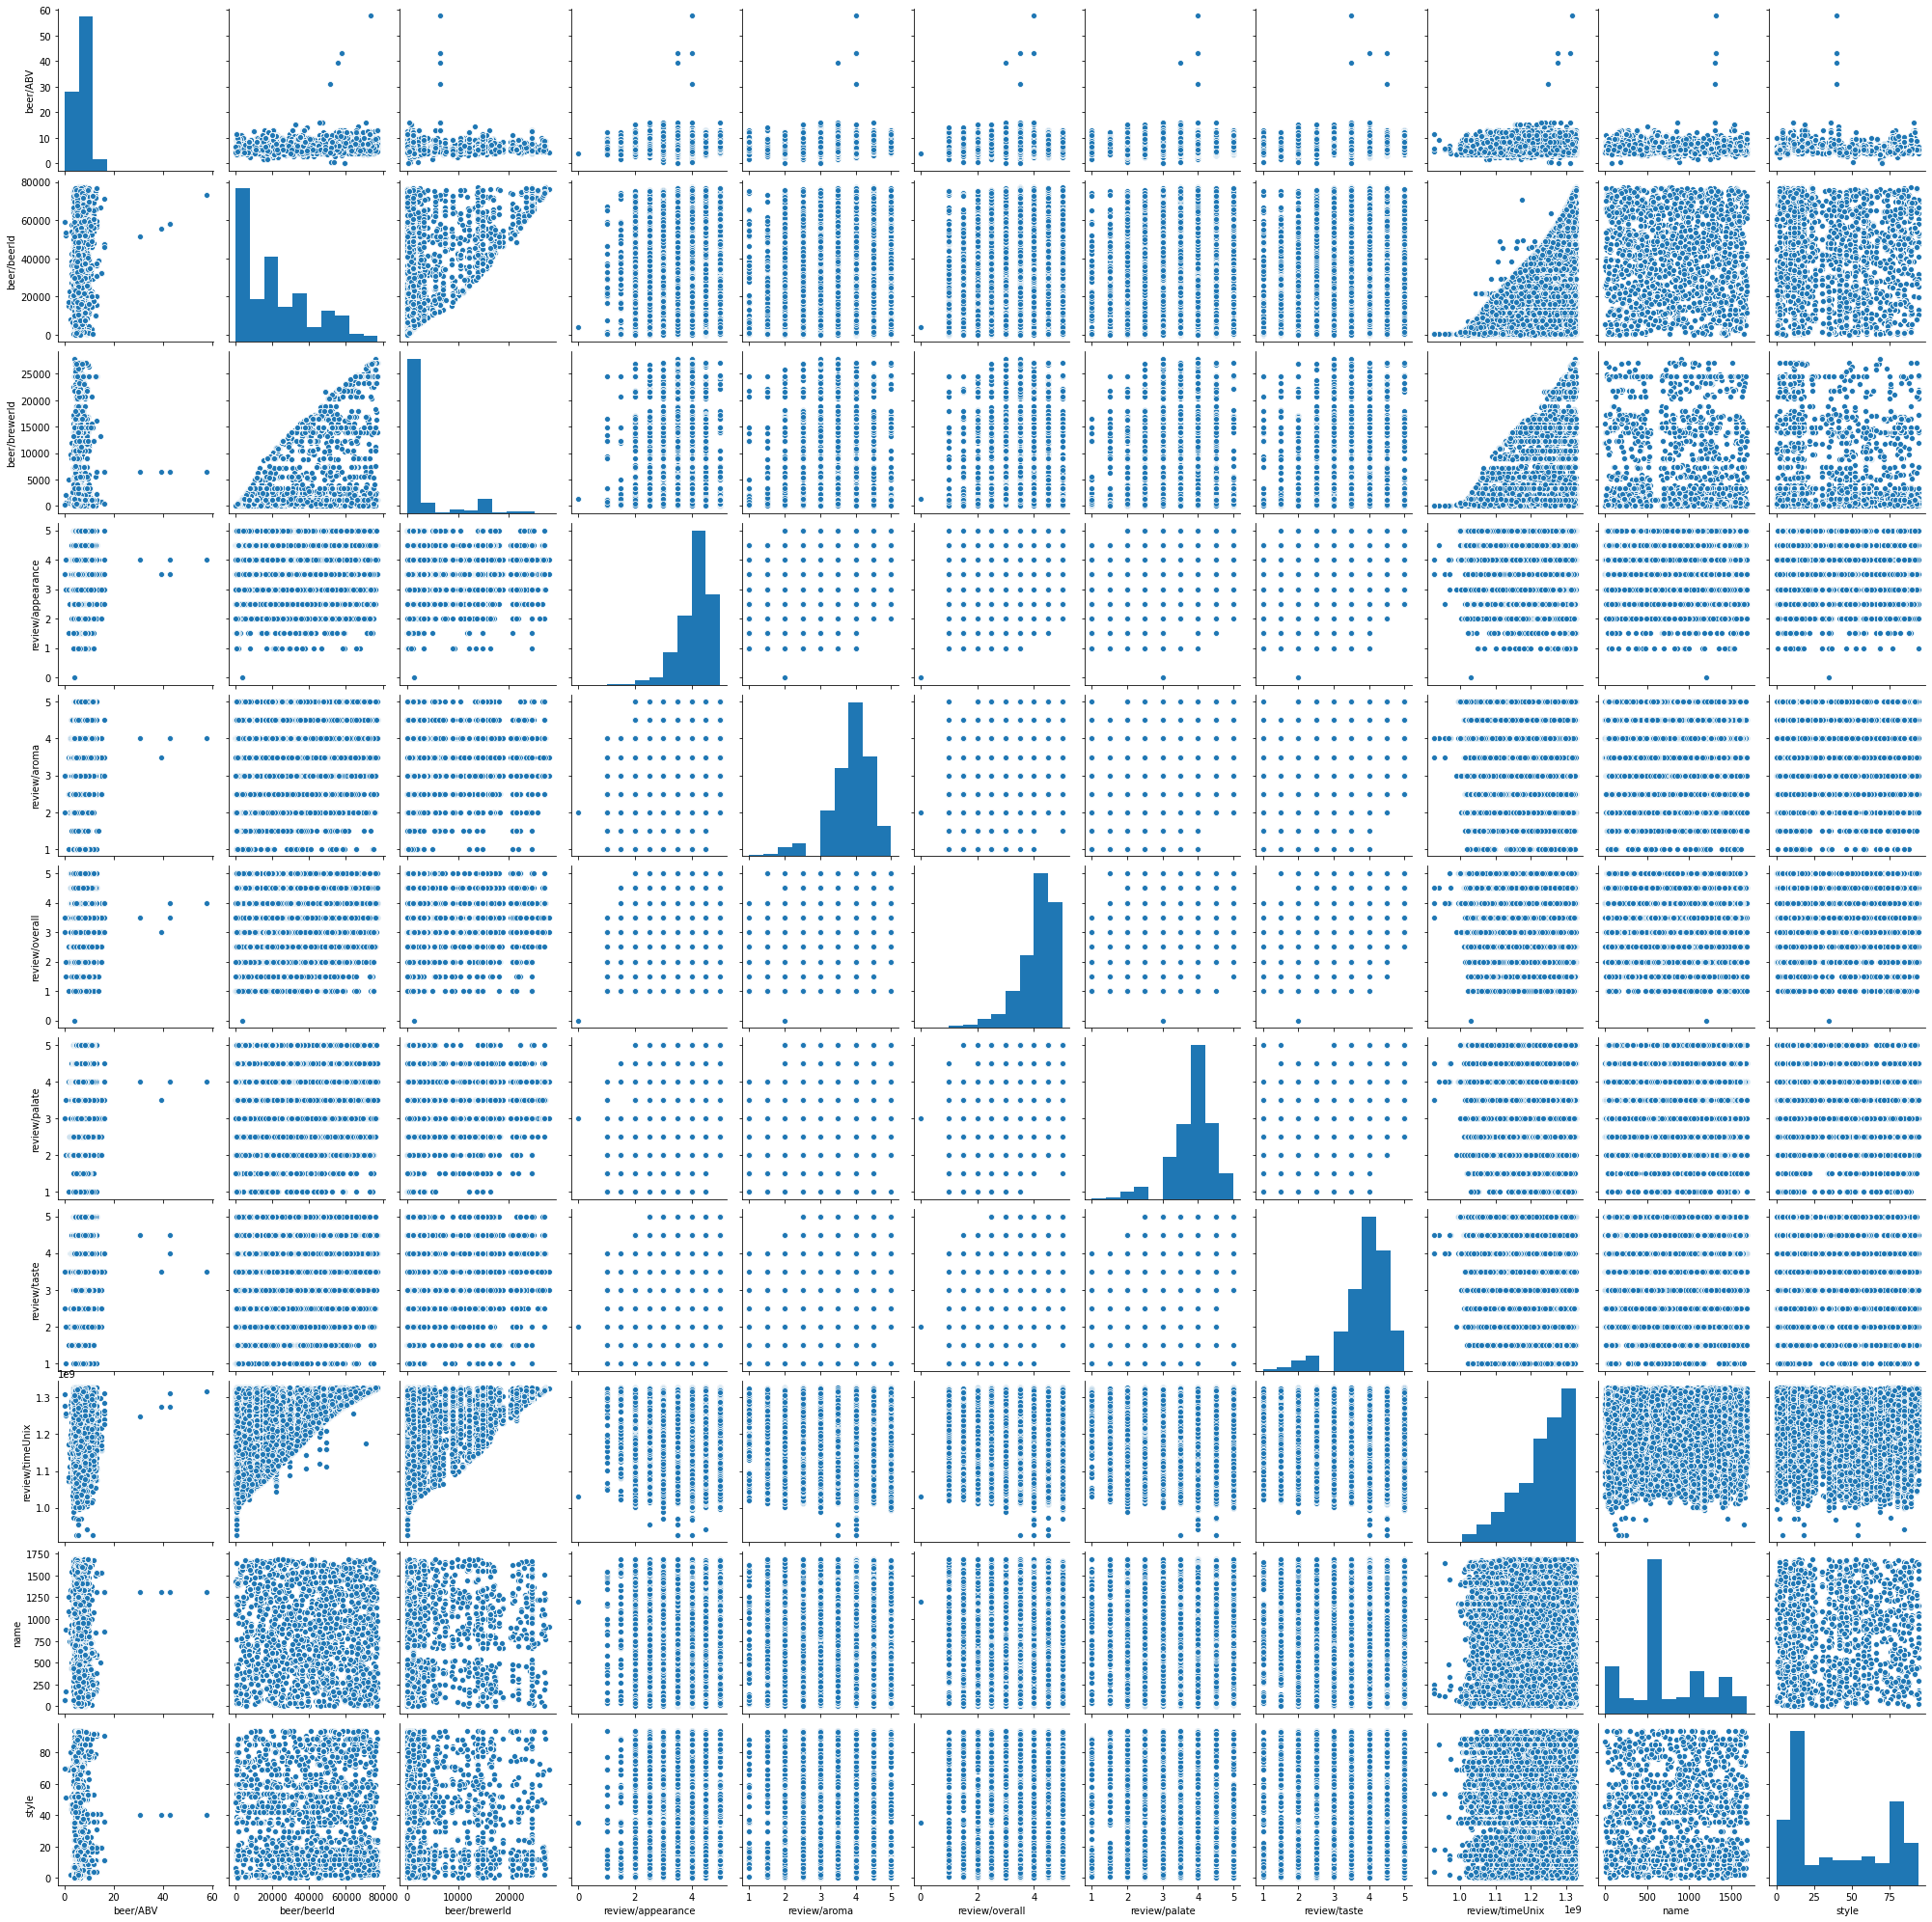

In [15]:
sns.pairplot(df)

In [16]:
df.corr(method="spearman")

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,name,style
beer/ABV,1.000000,0.403001,0.158904,0.310399,0.420854,0.219355,0.381970,0.400436,0.235271,-0.161615,-0.148488
beer/beerId,0.403001,1.000000,0.498505,0.022015,0.084217,0.001688,0.064537,0.059400,0.392218,-0.064602,-0.059261
beer/brewerId,0.158904,0.498505,1.000000,0.004068,0.014670,-0.013536,0.018938,0.001655,0.198540,-0.048372,-0.041664
review/appearance,0.310399,0.022015,0.004068,1.000000,0.494527,0.459855,0.514631,0.493197,0.060308,-0.120385,-0.083005
review/aroma,0.420854,0.084217,0.014670,0.494527,1.000000,0.558821,0.565142,0.670568,0.100310,-0.196785,-0.078499
review/overall,0.219355,0.001688,-0.013536,0.459855,0.558821,1.000000,0.645042,0.720763,0.058336,-0.097472,-0.070884
review/palate,0.381970,0.064537,0.018938,0.514631,0.565142,0.645042,1.000000,0.690602,0.083997,-0.147418,-0.070669
review/taste,0.400436,0.059400,0.001655,0.493197,0.670568,0.720763,0.690602,1.000000,0.086369,-0.173575,-0.063607
review/timeUnix,0.235271,0.392218,0.198540,0.060308,0.100310,0.058336,0.083997,0.086369,1.000000,-0.117146,-0.066777
name,-0.161615,-0.064602,-0.048372,-0.120385,-0.196785,-0.097472,-0.147418,-0.173575,-0.117146,1.000000,-0.058011


In [17]:
drop_col = ['beer/ABV', 'beer/beerId', 'beer/brewerId','style','name','review/timeUnix',
            'beer/style', 'beer/name','review/text', 'review/timeStruct']
df.drop(drop_col, axis=1, inplace=True)
df.columns

Index(['review/appearance', 'review/aroma', 'review/overall', 'review/palate',
       'review/taste'],
      dtype='object')

In [18]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/Input/rann_train.csv', index=False)